<h1 align="center">Linear Regression (Binary Classification) </h1>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

df = pd.read_csv("car_ownership.csv")
df.head(3)

,monthly_salary,owns_car
0,22000,0
1,25000,0
2,47000,1


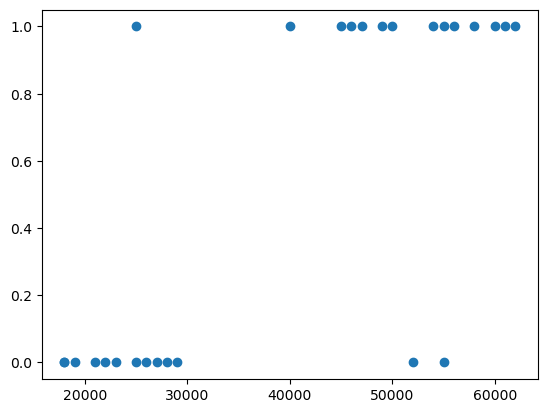

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df.monthly_salary, df.owns_car)

In [11]:
# Separate the features and the target variable
X = df[['monthly_salary']]
y = df['owns_car']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8888888888888888

In [15]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [17]:
y_test.tolist()

[1, 0, 1, 0, 0, 0, 1, 1, 0]

In [19]:
8/9

0.8888888888888888

In [21]:
X_test

,monthly_salary
8,62000
13,29000
9,61000
21,26000
0,22000
11,28000
16,25000
17,58000
12,27000


In [23]:
model.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [25]:
model.predict_proba(X_test)

array([[0.04530932, 0.95469068],
       [0.80955349, 0.19044651],
       [0.05158003, 0.94841997],
       [0.86480041, 0.13519959],
       [0.91687254, 0.08312746],
       [0.82967465, 0.17032535],
       [0.87995016, 0.12004984],
       [0.07564619, 0.92435381],
       [0.84806892, 0.15193108]])

In [27]:
model.coef_, model.intercept_

(array([[0.00013621]]), array([-5.39725076]))

In [29]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(salary, model):
    z = model.coef_ * salary + model.intercept_
    y = sigmoid(z[0][0])
    return y

prediction_function(62000, model)

0.954690678813166

In [31]:
prediction_function(29000, model)

0.1904465115158154

In [39]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



**Confusion Matrix**

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[5, 0],
       [1, 3]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Value')

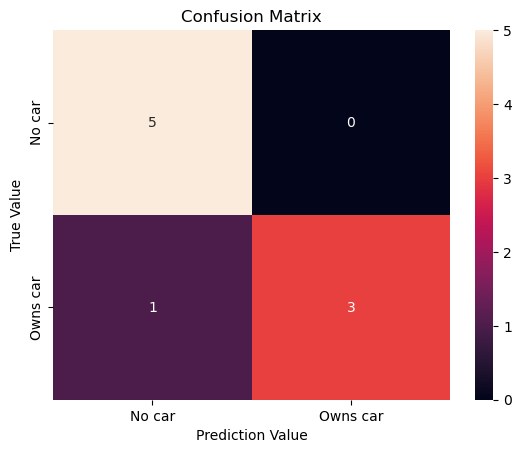

In [52]:
# lets plot the graph
import seaborn as sns
classes = ["No car","Owns car"]
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Prediction Value")
plt.ylabel('True Value')